# Ex1 Use data from Danmarks Statistik - Databanken
1. What is the change in pct of divorced danes from 2008 to 2020?


In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K4%2C2020K1'
df = pd.read_csv(url, delimiter=';')
df['TID'] = df['TID'].map(lambda x: int(x[:-2]))

print('The change in pct of divorced danes from 2008 to 2020 is: {}'.format(((df['INDHOLD']-df['INDHOLD'][0])/df['INDHOLD'][0])[1] * 100))

The change in pct of divorced danes from 2008 to 2020 is: 26.016531067484888


2. Which of the 5 biggest cities has the highest percentage of 'Never Married'?

In [3]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CTOT&Tid=2020K1&OMR%C3%85DE=101%2C147%2C155%2C185%2C165%2C151%2C153%2C157%2C159%2C161%2C163%2C167%2C169%2C183%2C173%2C175%2C187%2C201%2C240%2C210%2C250%2C270%2C260%2C217%2C219%2C223%2C230%2C400%2C411%2C253%2C259%2C350%2C265%2C269%2C320%2C376%2C316%2C326%2C360%2C370%2C306%2C329%2C330%2C340%2C336%2C390%2C420%2C430%2C440%2C482%2C410%2C480%2C450%2C461%2C479%2C492%2C530%2C561%2C563%2C607%2C510%2C621%2C540%2C550%2C573%2C575%2C630%2C580%2C710%2C766%2C615%2C707%2C727%2C730%2C741%2C740%2C746%2C706%2C751%2C657%2C661%2C756%2C665%2C760%2C779%2C671%2C791%2C810%2C813%2C860%2C849%2C825%2C846%2C773%2C840%2C787%2C820%2C851'
df = pd.read_csv(url, delimiter=';')
df['TID'] = df['TID'].map(lambda x: int(x[:-2]))
df = df.sort_values(by=['CIVILSTAND', 'INDHOLD'], ascending=False)
data = np.array(df)

biggest_cities = data[(data[:,0] == 'I alt')][0:5]
not_married = np.array(list(filter(lambda x: x[2] in biggest_cities[:,2], data[(data[:,0] == 'Ugift')])))
pct_of_not_married = {x[2]: (x[3]/biggest_cities[index][3]) * 100 for index,x in enumerate(not_married)}
pct_of_not_married = {k: v for k, v in sorted(pct_of_not_married.items(), key=lambda item: item[1], reverse=True)}

print('The highest percentage of "Never Married" in the biggest 5 cities is: {} with {}%'.format(list(pct_of_not_married.keys())[0], list(pct_of_not_married.values())[0]))

The highest percentage of "Never Married" in the biggest 5 cities is: København with 65.23579087199924%


3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

Text(0.5, 1.0, 'Number of married people pr. year')

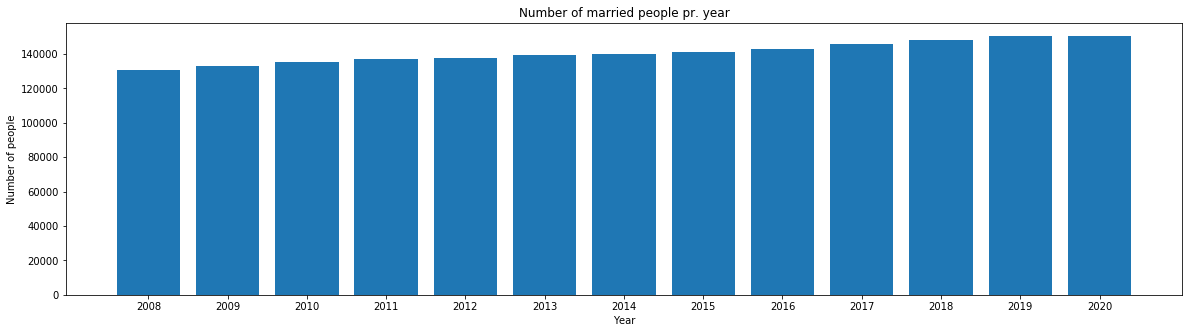

In [4]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&Tid=*&CIVILSTAND=G'
df = pd.read_csv(url, delimiter=';')
df['TID'] = df['TID'].map(lambda x: int(x[:-2]))
data = np.array(df)

cities = {}
for city in data:
    cities[city[1]] = city[3]

plt.figure(figsize=(20,5))

y_bar = cities.values()
x_bar = cities.keys()

plt.bar(x_bar, y_bar)

plt.xticks(list(x_bar))

plt.ylabel('Number of people')
plt.xlabel('Year')
plt.title('Number of married people pr. year')

4. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

{2008: 2191033, 2009: 2193779, 2010: 2191517, 2011: 2183712, 2012: 2173196, 2013: 2165925, 2014: 2148451, 2015: 2146756, 2016: 2145540, 2017: 2145883, 2018: 2146813, 2019: 2149938, 2020: 2146017}
{2008: 2568255, 2009: 2588198, 2010: 2610799, 2011: 2634540, 2012: 2657677, 2013: 2681019, 2014: 2709113, 2015: 2744254, 2016: 2780475, 2017: 2806141, 2018: 2827695, 2019: 2845453, 2020: 2844060}


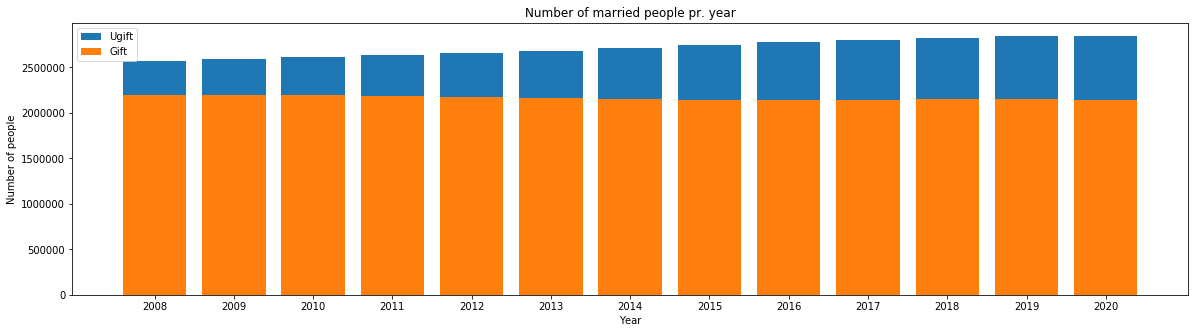

In [5]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?CIVILSTAND=G%2CU&OMR%C3%85DE=000&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1'
df = pd.read_csv(url, delimiter=';')
df['TID'] = df['TID'].map(lambda x: int(x[:-2]))
data = np.array(df)

citiesg = {}
citiesu = {}
for city in data:
    if city[0] == 'Gift/separeret':
        citiesg[city[2]] = city[3]
    else:
        citiesu[city[2]] = city[3]

print(citiesg)
print(citiesu)

plt.figure(figsize=(20,5))

y_barg = citiesg.values()
y_baru = citiesu.values()
x_bar = citiesg.keys()

plt.bar(x_bar, y_baru, label="Ugift")
plt.bar(x_bar, y_barg, label="Gift")

plt.xticks(list(x_bar))

plt.ylabel('Number of people')
plt.xlabel('Year')
plt.title('Number of married people pr. year')
plt.legend()